## Dataset Reading and Visulization

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import time
import cv2
import pandas as pd

from typing import Tuple, Callable
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.engine.training import Model
import functools
import os
import numpy as np

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes=len(np.unique(y_train))
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)
Classes={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

cifar-10 dataset consists of 50000 training images of digits and 10000 testing images. The dataset consists of 32*32*3 rgb  images.

In [4]:
print('Training Dataset shape:',X_train.shape)
print('Training labels shape:',y_train.shape)

print('Testing Dataset shape:',X_test.shape)
print('Testing labels shape:',y_test.shape)

print('Unique Labels:',np.unique(y_train))

Training Dataset shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Testing Dataset shape: (10000, 32, 32, 3)
Testing labels shape: (10000,)
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


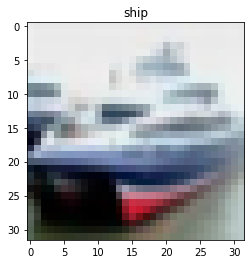

In [5]:
# Visulizing Dataset one example.
plt.imshow(X_test[1])
plt.title(Classes[y_test[1]]);

Visualizing first 40 images from training dataset and their labels. 

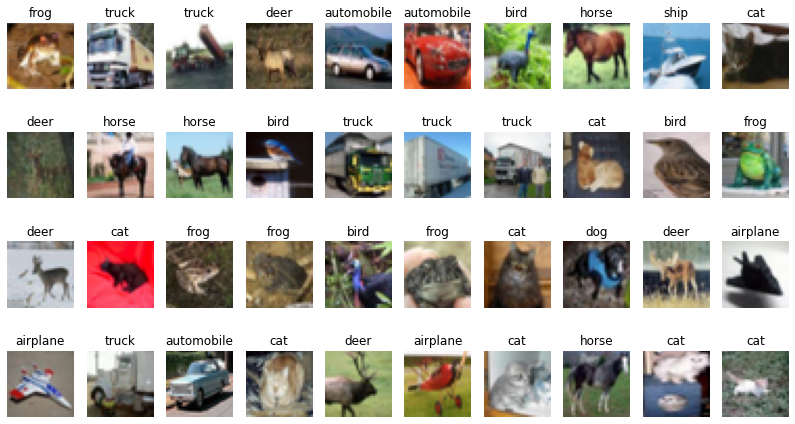

In [6]:
plt.figure(figsize=(14,80))
for i in range (0,40):
    plt.subplot(40,10,i+1)
    img1=X_train[i]
    plt.imshow(img1)
    plt.title(Classes[y_train[i]])
    plt.axis('off')
plt.show()

In [7]:
train_X=X_train
test_X=X_test

print('X_train shape:',train_X.shape)
print('X_test shape:',test_X.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [8]:
train_y=to_categorical(y_train,num_classes)
test_y=to_categorical(y_test,num_classes)

print('y_train shape:',train_y.shape)
print('y_test shape:',test_y.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


## Classification Method:

### VGG:

In [9]:
def VGG_16(num_classes,img_size=(32,32,3)):
    initial_model: Model = VGG16(include_top=False, weights=None,input_shape=img_size)

    x = layers.Flatten()(initial_model.output)
    x = layers.Dense(256, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(initial_model.input, predictions)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [10]:
VGG_model=VGG_16(num_classes,img_size=(32,32,3))
VGG_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [12]:
def get_callbacks_list():
    """Get callbacks for a model"""
    return [keras.callbacks.EarlyStopping(monitor='val_acc',patience=20),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5)]

In [13]:
history_vgg = VGG_model.fit(train_X,train_y,batch_size=128,epochs = 200,callbacks=get_callbacks_list(),validation_split=0.1)


Train on 45000 samples, validate on 5000 samples
Epoch 1/200
45000/45000 [==============================] - 57s 1ms/step - loss: 2.4082 - acc: 0.1037 - val_loss: 2.3010 - val_acc: 0.1058
Epoch 2/200
45000/45000 [==============================] - 53s 1ms/step - loss: 2.3181 - acc: 0.1017 - val_loss: 2.3037 - val_acc: 0.0976
Epoch 3/200
45000/45000 [==============================] - 54s 1ms/step - loss: 2.3031 - acc: 0.1021 - val_loss: 2.3167 - val_acc: 0.1064
Epoch 4/200
45000/45000 [==============================] - 54s 1ms/step - loss: 2.2424 - acc: 0.1347 - val_loss: 1.9479 - val_acc: 0.2002
Epoch 5/200
45000/45000 [==============================] - 54s 1ms/step - loss: 1.7903 - acc: 0.2976 - val_loss: 1.6247 - val_acc: 0.3642
Epoch 6/200
45000/45000 [==============================] - 54s 1ms/step - loss: 1.4971 - acc: 0.4327 - val_loss: 1.3739 - val_acc: 0.4878
Epoch 7/200
45000/45000 [==============================] - 54s 1ms/step - loss: 1.2704 - acc: 0.5380 - val_loss: 1.2387 - 

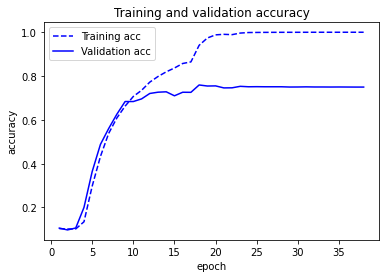

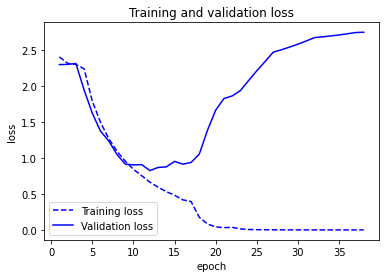

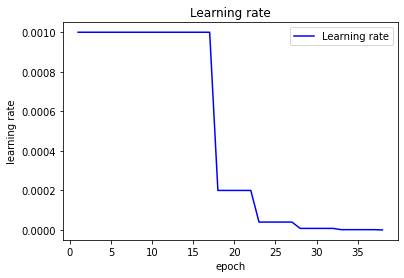

In [14]:
def draw_training_info_plots(_history):
    """Draw loss graphs at the training and validation stage"""
    acc = _history.history['acc']
    val_acc = _history.history['val_acc']
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']

    epochs_plot = range(1, len(acc) + 1)
    plt.plot(epochs_plot, acc, 'b--', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs_plot, loss, 'b--', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    if 'lr' in _history.history:
        learning_rate = _history.history['lr']
        plt.plot(epochs_plot, learning_rate, 'b', label='Learning rate')
        plt.title('Learning rate')
        plt.xlabel('epoch')
        plt.ylabel('learning rate')
        plt.legend()
        plt.show()
    return

draw_training_info_plots(history_vgg)

In [15]:
print('Accuracy:',VGG_model.evaluate(test_X,test_y,verbose=0)[1])

Accuracy: 0.7437999844551086


#### Classification Score and Confusion Metric

In [16]:
predictions = VGG_model.predict(test_X)

from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, np.argmax(predictions,axis=1)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.88      0.88      0.88      1000
           2       0.64      0.63      0.63      1000
           3       0.52      0.59      0.55      1000
           4       0.72      0.66      0.69      1000
           5       0.63      0.67      0.65      1000
           6       0.82      0.80      0.81      1000
           7       0.79      0.77      0.78      1000
           8       0.86      0.83      0.85      1000
           9       0.86      0.82      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.75      0.74      0.75     10000



In [27]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,np.argmax(predictions,axis=1)),columns=list(np.array(list(Classes.items()))[:,1]),index=list(np.array(list(Classes.items()))[:,1]))

Confusion matrix


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,790,13,59,26,16,3,5,17,50,21
automobile,10,880,1,10,1,2,6,2,29,59
bird,67,1,627,78,81,64,46,20,11,5
cat,23,6,72,591,52,167,43,30,10,6
deer,18,1,82,70,658,45,53,67,5,1
dog,6,2,44,182,33,673,10,42,3,5
frog,3,3,62,71,30,24,795,5,3,4
horse,15,1,23,52,43,75,4,772,2,13
ship,73,28,14,21,1,5,6,6,832,14
truck,41,65,3,30,3,6,2,13,17,820


In [28]:
VGG_model.save('VGG_model_cifar10.h5')

### Resnet:

In [29]:
def Resnet_50(num_classes,img_size=(32,32,3)):
    initial_model: Model = ResNet50(include_top=False, weights=None,input_shape=img_size)

    x = layers.Flatten()(initial_model.output)
    x = layers.Dense(256, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(initial_model.input, predictions)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [33]:
Resnet_model=Resnet_50(num_classes,img_size=(32,32,3))
Resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [34]:
def get_callbacks_list():
    """Get callbacks for a model"""
    return [keras.callbacks.EarlyStopping(monitor='val_acc',patience=20),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5)]

In [35]:
history_resnet = Resnet_model.fit(train_X,train_y,batch_size=256,epochs = 200,callbacks=get_callbacks_list(),validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/200
45000/45000 [==============================] - 62s 1ms/step - loss: 1.9366 - acc: 0.3421 - val_loss: 2.1362 - val_acc: 0.2084
Epoch 2/200
45000/45000 [==============================] - 53s 1ms/step - loss: 1.3817 - acc: 0.5038 - val_loss: 1.4493 - val_acc: 0.4808
Epoch 3/200
45000/45000 [==============================] - 53s 1ms/step - loss: 1.1794 - acc: 0.5789 - val_loss: 1.4986 - val_acc: 0.4886
Epoch 4/200
45000/45000 [==============================] - 53s 1ms/step - loss: 1.0378 - acc: 0.6325 - val_loss: 1.4795 - val_acc: 0.4996
Epoch 5/200
45000/45000 [==============================] - 53s 1ms/step - loss: 0.9305 - acc: 0.6705 - val_loss: 1.3818 - val_acc: 0.5426
Epoch 6/200
45000/45000 [==============================] - 52s 1ms/step - loss: 0.8244 - acc: 0.7084 - val_loss: 2.0437 - val_acc: 0.4354
Epoch 7/200
45000/45000 [==============================] - 53s 1ms/step - loss: 0.7393 - acc: 0.7425 - val_loss: 1.6434 - v

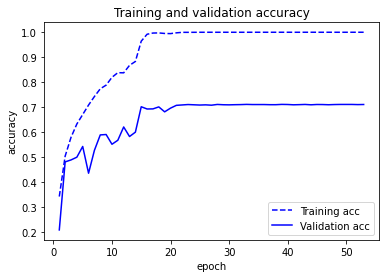

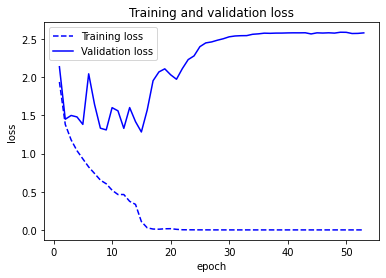

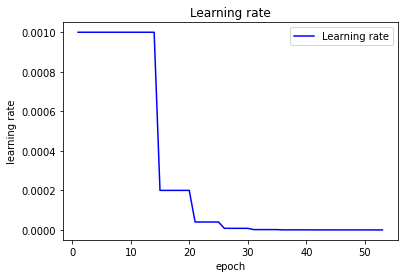

In [36]:
def draw_training_info_plots(_history):
    """Draw loss graphs at the training and validation stage"""
    acc = _history.history['acc']
    val_acc = _history.history['val_acc']
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']

    epochs_plot = range(1, len(acc) + 1)
    plt.plot(epochs_plot, acc, 'b--', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs_plot, loss, 'b--', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    if 'lr' in _history.history:
        learning_rate = _history.history['lr']
        plt.plot(epochs_plot, learning_rate, 'b', label='Learning rate')
        plt.title('Learning rate')
        plt.xlabel('epoch')
        plt.ylabel('learning rate')
        plt.legend()
        plt.show()
    return

draw_training_info_plots(history_resnet)

In [37]:
print('Accuracy:',Resnet_model.evaluate(test_X,test_y,verbose=0)[1])

Accuracy: 0.70169997215271


#### Classification Score and Confusion Metric

In [38]:
predictions = Resnet_model.predict(test_X)

from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, np.argmax(predictions,axis=1)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.79      0.82      0.81      1000
           2       0.62      0.58      0.60      1000
           3       0.50      0.52      0.51      1000
           4       0.65      0.66      0.65      1000
           5       0.61      0.60      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.74      0.75      0.74      1000
           8       0.84      0.81      0.82      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [39]:
from sklearn.metrics import confusion_matrix
import pandas as pd
print ("Confusion matrix")
pd.DataFrame(confusion_matrix(y_test,np.argmax(predictions,axis=1)),columns=list(np.array(list(Classes.items()))[:,1]),index=list(np.array(list(Classes.items()))[:,1]))

Confusion matrix


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,765,22,54,19,25,11,6,11,52,35
automobile,17,816,13,11,3,9,7,3,31,90
bird,73,9,581,78,92,56,54,35,11,11
cat,24,13,66,523,63,173,63,46,10,19
deer,20,5,70,72,656,28,51,85,7,6
dog,11,7,48,197,45,597,27,51,8,9
frog,7,7,48,61,46,40,767,10,5,9
horse,19,4,28,52,62,57,8,748,2,20
ship,66,35,19,16,12,7,4,3,811,27
truck,37,109,14,15,5,7,11,17,32,753


In [40]:
Resnet_model.save('Resnet_model_cifar10.h5')